In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
cwd = pathlib.Path("/content/gdrive/MyDrive/telco_customer_churn_prediction/")
cwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


PosixPath('/content/gdrive/MyDrive/telco_customer_churn_prediction')

In [3]:
df= pd.read_csv(cwd / "Telco-Customer-Churn.csv")

In [4]:
df.shape

(7032, 21)

In [5]:
df.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
#Unique values in object types (excluding customerID)
for col in df.drop(columns="customerID").select_dtypes(include="object").columns: print(f"{col}: {len(df[col].unique())}")

gender: 2
Partner: 2
Dependents: 2
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
Churn: 2


In [7]:
df= df.drop(columns="customerID")

In [8]:
X= df.drop(columns="Churn")
y= df["Churn"]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [10]:
X_obj= X.select_dtypes(include="object")
X_num = X.select_dtypes(exclude="object")

In [11]:
X_obj_dummies= pd.get_dummies(data=X_obj,drop_first=True)

In [12]:
X_obj_dummies.shape

(7032, 26)

In [13]:
X_obj_dummies.head().transpose()

,0,1,2,3,4
gender_Male,0,1,1,1,0
Partner_Yes,1,0,0,0,0
Dependents_Yes,0,0,0,0,0
PhoneService_Yes,0,1,1,0,1
MultipleLines_No phone service,1,0,0,1,0
MultipleLines_Yes,0,0,0,0,0
InternetService_Fiber optic,0,0,0,0,1
InternetService_No,0,0,0,0,0
OnlineSecurity_No internet service,0,0,0,0,0
OnlineSecurity_Yes,0,1,1,1,0


In [14]:
X_d = pd.concat([X_num,X_obj_dummies],axis=1)
X_d.shape

(7032, 30)

In [15]:
y=y.map({"No":0,"Yes":1})

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.2, random_state=555)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [19]:
pipe= Pipeline(steps=[('est',RandomForestClassifier())])
pipe_rfc= Pipeline(steps=[('scaler',StandardScaler()),('rfc',RandomForestClassifier())])
pipe_gbc=Pipeline(steps=[('scaler',StandardScaler()),('gbc',GradientBoostingClassifier())])
pipe_svc= Pipeline(
    steps=[
        ('scaler',StandardScaler),
        ('svc',SVC(class_weight='balanced'))
        ])

In [27]:
scaler = StandardScaler()

In [28]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [29]:
params_grid = [{
                'est':[SVC(class_weight='balanced')],
                'est__C':[0.001,0.01,0.1,0.5,1],
                'est__gamma':['scale','auto']
                },
               {
                'est':[RandomForestClassifier()],
                'est__n_estimators': [10, 50, 100, 200, 300, 500]
                },
                {
                'est': [GradientBoostingClassifier()],
                'est__n_estimators':[1,5,10,20,40,100],
                'est__max_depth':[3,4,5,6],
                }
              ]


In [30]:
grid = GridSearchCV(estimator=pipe,
                    param_grid=params_grid,
                    scoring='accuracy',
                    cv=3,
                    verbose=10,
                    n_jobs=2)

In [33]:
scaled_X_train[0:5]

array([[ 2.28223778, -0.75442721,  0.47399864, -0.54972689, -0.99911151,
        -0.96660184, -0.65728721,  0.33118926, -0.33118926, -0.8573448 ,
         1.14003199, -0.52544165, -0.52544165,  1.57848665, -0.52544165,
         1.37281295, -0.52544165, -0.72329241, -0.52544165, -0.64124033,
        -0.52544165, -0.78983876, -0.52544165, -0.79787323, -0.51357663,
        -0.56359453, -1.2001446 , -0.53149764,  1.41534569, -0.54276283],
       [-0.43816644,  0.95573809,  0.01868573,  0.54215157, -0.99911151,
         1.03455214,  1.52140493,  0.33118926, -0.33118926,  1.16639187,
        -0.87716837, -0.52544165, -0.52544165,  1.57848665, -0.52544165,
        -0.72843136, -0.52544165, -0.72329241, -0.52544165, -0.64124033,
        -0.52544165,  1.26608119, -0.52544165, -0.79787323,  1.94712911,
        -0.56359453, -1.2001446 , -0.53149764, -0.70654117, -0.54276283],
       [-0.43816644,  1.44435675, -0.29152746,  0.69106922, -0.99911151,
         1.03455214, -0.65728721,  0.33118926, -0

In [34]:
grid.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('est', RandomForestClassifier())]),
             n_jobs=2,
             param_grid=[{'est': [SVC(class_weight='balanced')],
                          'est__C': [0.001, 0.01, 0.1, 0.5, 1],
                          'est__gamma': ['scale', 'auto']},
                         {'est': [RandomForestClassifier()],
                          'est__n_estimators': [10, 50, 100, 200, 300, 500]},
                         {'est': [GradientBoostingClassifier(n_estimators=40)],
                          'est__max_depth': [3, 4, 5, 6],
                          'est__n_estimators': [1, 5, 10, 20, 40, 100]}],
             scoring='accuracy', verbose=10)

In [35]:
grid.best_params_

{'est': GradientBoostingClassifier(n_estimators=40),
 'est__max_depth': 3,
 'est__n_estimators': 40}

In [36]:
grid_cv_results = pd.DataFrame(grid.cv_results_)

In [37]:
grid_cv_results.sort_values(by="mean_test_score",ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est,param_est__C,param_est__gamma,param_est__n_estimators,param_est__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
20,0.411248,0.013519,0.004208,0.000083,GradientBoostingClassifier(n_estimators=40),NaN,NaN,40,3,{'est': GradientBoostingClassifier(n_estimator...,0.797867,0.805867,0.792000,0.798578,0.005683,1
26,0.535031,0.023907,0.004908,0.000064,GradientBoostingClassifier(n_estimators=40),NaN,NaN,40,4,{'est': GradientBoostingClassifier(n_estimator...,0.794133,0.809600,0.789867,0.797867,0.008478,2
21,1.003580,0.013852,0.007171,0.000652,GradientBoostingClassifier(n_estimators=40),NaN,NaN,100,3,{'est': GradientBoostingClassifier(n_estimator...,0.793600,0.807467,0.787733,0.796267,0.008274,3
25,0.264068,0.004030,0.005651,0.002866,GradientBoostingClassifier(n_estimators=40),NaN,NaN,20,4,{'est': GradientBoostingClassifier(n_estimator...,0.801067,0.801067,0.780267,0.794133,0.009805,4
31,0.316138,0.000707,0.004053,0.000144,GradientBoostingClassifier(n_estimators=40),NaN,NaN,20,5,{'est': GradientBoostingClassifier(n_estimator...,0.797333,0.802133,0.781867,0.793778,0.008647,5


In [38]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [39]:
y_pred=grid.predict(scaled_X_test)

In [43]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [44]:
y_test

1857    0
2676    0
5319    0
414     0
312     0
       ..
6169    0
1815    0
6115    0
6340    0
4397    1
Name: Churn, Length: 1407, dtype: int64

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


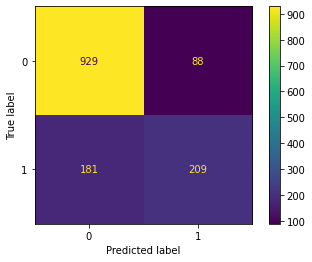

In [47]:
plot_confusion_matrix(grid.best_estimator_,scaled_X_test,y_test.to_numpy().reshape(-1,1))

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1017
           1       0.70      0.54      0.61       390

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407

